In [6]:
# SKRYPT PRZEDSTAWIA ODPORNOŚĆ SIECI Z WAGAMI USTALONYMI PRZY POMOCY ALGORYTMU GRAMA-SCHMIDTA NA ZASZUMIENIE WZORCA PREZENTOWANEGO
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
import copy
import random
import chaotic_network as cn
get_ipython().magic('matplotlib inline')
fig_size = [12, 9]
plt.rcParams["figure.figsize"] = fig_size

In [7]:
N = 100
p = 4

In [10]:
step = 0.01
ratios = np.arange(0,1+step,step)
prob = np.zeros(np.size(ratios))
it = 2500
trans = 2000
it2 = 100

In [11]:
for z in range(it2):
    ii = 0
    for ratio in ratios:
        ###generowanie losowych wzorcow###
        pat = np.random.randint(0,2,(p,N))
        pat = pat*2-1
        ###zaszumienie jednego z wybranych wzorcow zgodnie z poziomem szumu###
        indices2 = random.sample(range(N),int(round(ratio*N)))
        index = 0
        dist = pat[index,:].copy()
        for i in range(int(round(ratio*N))):
            dist[indices2[i]] = dist[indices2[i]]*random.choice([-1,1])
        L, L_nor = cn.gram_schmidt(pat)
        w = cn.hebb(L_nor)
        x_0 = np.random.rand(1,N)
        eta_0 = np.zeros((1,N))
        zeta_0 = np.zeros((1,N))
        x = x_0
        eta = eta_0
        zeta = zeta_0
        a = 6.4+dist #stymulacja zaszumionym wzorcem
        mu = np.zeros((p,it))
        for i in range(it):
            out = cn.network_step(x, eta, zeta, w, a)
            x = out[0]
            eta = out[1]
            zeta = out[2]
            mu[:,i] = cn.overlap(x,pat,N)
        meanmu = np.mean(mu[:,trans:],1)
        if np.argmax(meanmu) == index:
            if np.size(np.unique(meanmu)) != np.size(np.unique(np.delete(meanmu,index))):
                prob[ii] = prob[ii]+1
        ii=ii+1
prob=prob/it2

(0.40000000000000002, 1.02)

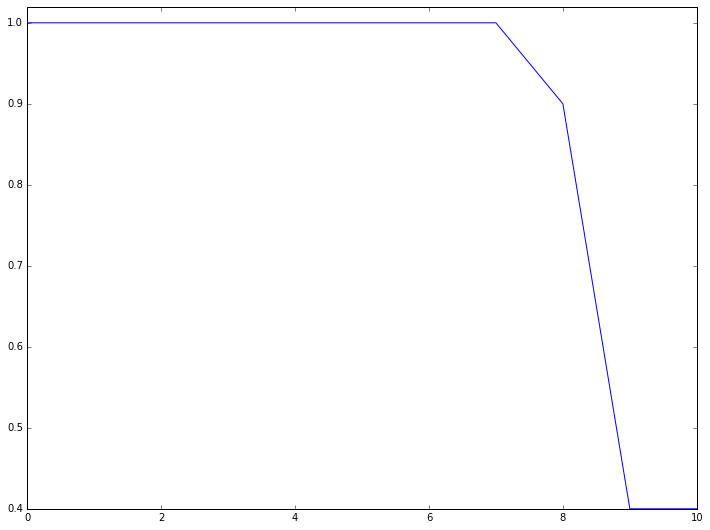

In [13]:
plt.plot(ratios,prob)
plt.ylim(ymax=1.02)